In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as ss
import pingouin as pg
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                        MultiComparison)


In [2]:
# В первом тестировали разрешение фотографий блюд в приложении: 
# пользователям показывались либо прямоугольные, либо новые квадратные 

In [61]:
# Необходимо провести однофакторный дисперсионный анализ

In [3]:
data1 = pd.read_csv('5_task_1.csv')

In [4]:
data1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [10]:
group_a = data1.query('group == "A"').events
group_a.shape

(10000,)

In [11]:
group_b = data1.query('group == "B"').events
group_b.shape

(10000,)

In [21]:
group_c = data1.query('group == "C"').events

In [ ]:
# 1. Проверка гомогенности дисперсий в группах

In [8]:
std_a = np.std(group_a)
std_a

10.078872151188346

In [9]:
std_b = np.std(group_b)
std_b

9.847867537695661

In [22]:
std_c = np.std(group_c)
std_c

9.958549990334937

In [23]:
ss.levene(group_a, group_b, group_c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [14]:
pg.homoscedasticity(data=data1, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [15]:
# Итого: equal_var = True, p-value = 0.104 > 0.05 => Принимаем H0 о равенстве дисперсий

In [16]:
# 2. Тест на нормальность распределения 

In [25]:
# тест Д'Агостино-Пирсона
print(ss.normaltest(group_a))
print(ss.normaltest(group_b))
print(ss.normaltest(group_c))

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


In [26]:
# group_a: pvalue=0.349 > 0.05 => Принимаем H0 о нормальности данных
# group_b: pvalue=0.657 > 0.05 => Принимаем H0 о нормальности данных
# group_c: pvalue=0.198 > 0.05 => Принимаем H0 о нормальности данных

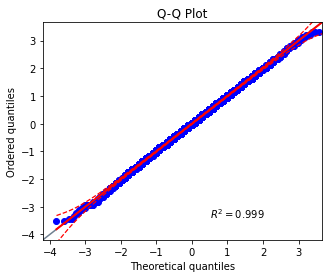

In [28]:
pg.qqplot(group_a)

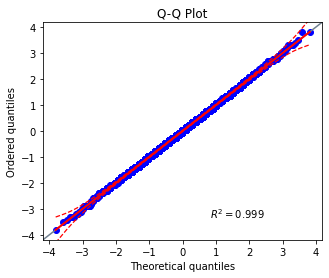

In [29]:
pg.qqplot(group_b)

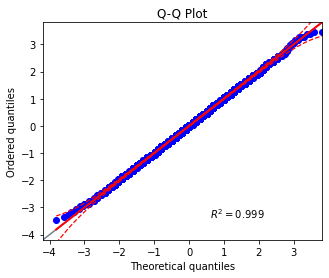

In [30]:
pg.qqplot(group_c)

In [27]:
# 3. Сравнить средние в представленных группах

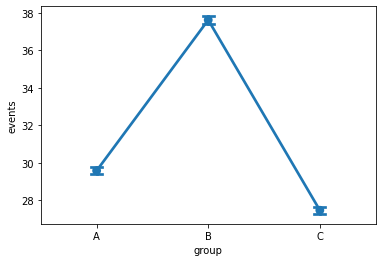

In [32]:
sns.pointplot(x='group', y='events', data=data1, capsize=0.1)

In [34]:
ss.f_oneway(group_a, group_b, group_c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [36]:
model = formula = smf.ols("events~group", data = data1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
group,2.0,5.729361e+05,286468.062300,2886.166657,0.0
Residual,29997.0,2.977369e+06,99.255551,NaN,NaN


In [37]:
pg.anova(data=data1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


In [35]:
# Тремя способами получилось p-value = 0 < 0.05 => Отклоняем H0 о равенстве средних в группах

In [ ]:
# Вывод: средние в группах отличаются значимо => наш эксперимент имеет какой-то эффект

In [38]:
# 4. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия

In [ ]:
# Критерий Тьюки показывает, между какими группами есть статистически значимые различия

In [39]:
# поправка Тьюки для множественного сравнения
pg.pairwise_tukey(data=data1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


In [40]:
# Для каждого попраного сравнения групп имеем p-value = 0.001 < 0.05 => Отклоняем H0 о равенстве срдених в группах

In [ ]:
# Столбец diff показывает различие в средних между группами (2 - 1), именно в таком порядке

In [41]:
# Вывод: Критерий Тьюки подтвердил, что средние в группах различаются значимо => наш эксперимент имеет какой-то эффект

In [44]:
# поправка Геймс-Хоуэлла
pg.pairwise_gameshowell(data=data1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,0.001,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,0.001,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.001,1.024138


In [46]:
# поправка Бонферрони
pg.pairwise_ttests(data=data1, dv='events', between='group', padjust='bonf')

/opt/tljh/user/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,2.250078e-49,bonf,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,1.024138


In [47]:
# поправка Холма
pg.pairwise_ttests(data=data1, dv='events', between='group', padjust='holm')

/opt/tljh/user/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,7.500262e-50,holm,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,1.024138


In [48]:
# 5. Примите решение: какие картинки в итоге будем использовать?
# В среднем, в группе B покупали больше (выше mean(group_b) = 37.6136) => Оставляем квадратные фото

In [49]:
# Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, 
# с разбивкой по сегменту клиента.

In [60]:
# Необходимо провести двухфакторный дисперсионный анализ

In [50]:
data2 = pd.read_csv('5_task_2.csv')

In [51]:
data2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [56]:
test = data2.query('group == "test"').events

In [57]:
control = data2.query('group == "control"').events

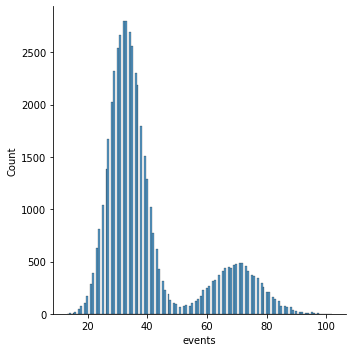

In [58]:
sns.displot(test)

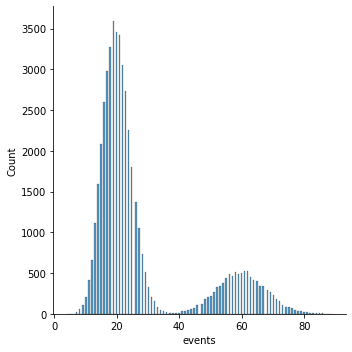

In [59]:
sns.displot(control)

In [69]:
# 1. Описательные статистики по группам и сегментам
data2.groupby(['group', 'segment'], as_index=False).agg({'events': ['median', 'mean', 'std']})

group segment events                     
                   median       mean       std
0  control    high   60.0  59.970800  7.805347
1  control     low   20.0  20.031575  4.473576
2     test    high   70.0  69.938500  8.403974
3     test     low   33.0  33.025925  5.720845

In [71]:
np.round(7.805347, 2)

7.81

In [72]:
# 2. Двухфакторный анализ с взаимодействием факторов (группа и сегмент) и исследование их эффектов на events

In [74]:
formula = 'data2.events ~ data2.group * data2.segment'
model_main = smf.ols(formula, data = data2).fit()
anova_lm(model_main)

,df,sum_sq,mean_sq,F,PR(>F)
data2.group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
data2.segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
data2.group:data2.segment,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [75]:
pg.anova(data=data2, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [76]:
# Для фактора group: p-value = 0 => Принимаем H0 и говорим о том, что фактор влияет на средний events
# Для фактора segment: p-value = 0 => Принимаем H0 и говорим о том, что фактор влияет на средний events
# Для взаимодействия group и segment: p-value = 0 => Принимаем H0 и говорим о том, что факторы вместе влияют на средний events

In [ ]:
# Сравнения между группами

In [78]:
data2['combination'] = data2.group + ' / ' + data2.segment
data2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test / high
1,96723,test,high,71.0,test / high
2,68719,test,high,80.0,test / high
3,50399,test,high,80.0,test / high
4,95613,test,high,78.0,test / high


In [80]:
# Через спец функцию MultiComparison
MultiComparison(data2.events, data2.combination).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True


In [81]:
# То же, но через pairwise_tukeyhsd
pairwise_tukeyhsd(data2.events, data2.combination).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control / high,control / low,-39.9392,0.001,-40.1073,-39.7711,True
control / high,test / high,9.9677,0.001,9.7551,10.1803,True
control / high,test / low,-26.9449,0.001,-27.113,-26.7768,True
control / low,test / high,49.9069,0.001,49.7388,50.075,True
control / low,test / low,12.9944,0.001,12.888,13.1007,True
test / high,test / low,-36.9126,0.001,-37.0807,-36.7445,True


In [ ]:
# Столбец meandiff отражает различие в средних между второй и первой группой, именно в таком порядке !!!
# Смотрим на столбец reject. Если там стоит True - различия значимые.

In [ ]:
# Выводы по сравнению групп:
    # 1. Для обоих сегментов (high и low) показатели статистически значимо _увеличились_ по сравнению с контрольной группой:
        # То есть meandiff(test/high - control/high) = 9.9677 и meandiff(test/low - control/low) = 12.9944, p-value = 0.001 < 0.05
    # 2. Разница между control/high и test/high составила около 10
    # 3. Разница между значением у тестовой группы сегмента low и контрольной группой этого же сегмента равна примерно 13

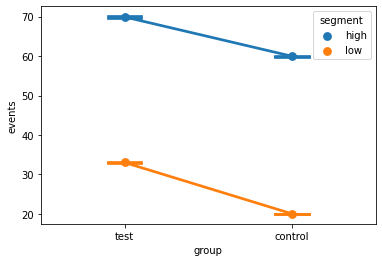

In [82]:
# 3. Визуализация результатов теста
sns.pointplot(x='group', y='events', hue='segment', data=data2, capsize=0.2)

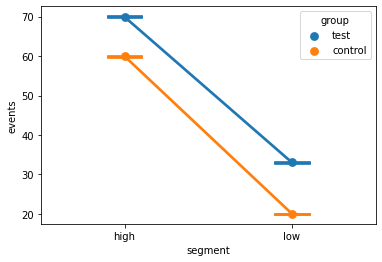

In [83]:
sns.pointplot(x='segment', y='events', hue='group', data=data2, capsize=0.2)

In [84]:
# Кол-во действий в тестовой группе выше, чем в контрольной (эффект от фактора группы есть)
# Кол-во действий в сегменте low всегда ниже, чем в сегменте high (эффект от фактора сегмента также есть)
# Таким образом, наблюдается эффект от взаимодействия факторов

In [ ]:
# Вывод по графикам:
# Фактор group оказался значимым, фактор сегмент оказался значимым, их взаимодействие также значимо.
# Судя по графику, для всех групп среднее значение events увеличилось в тестовой группе. 
# Поэтому решение - сделать новую версию кнопки.